In [1]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import geopandas as gpd

from Illinois_network import *

In [2]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

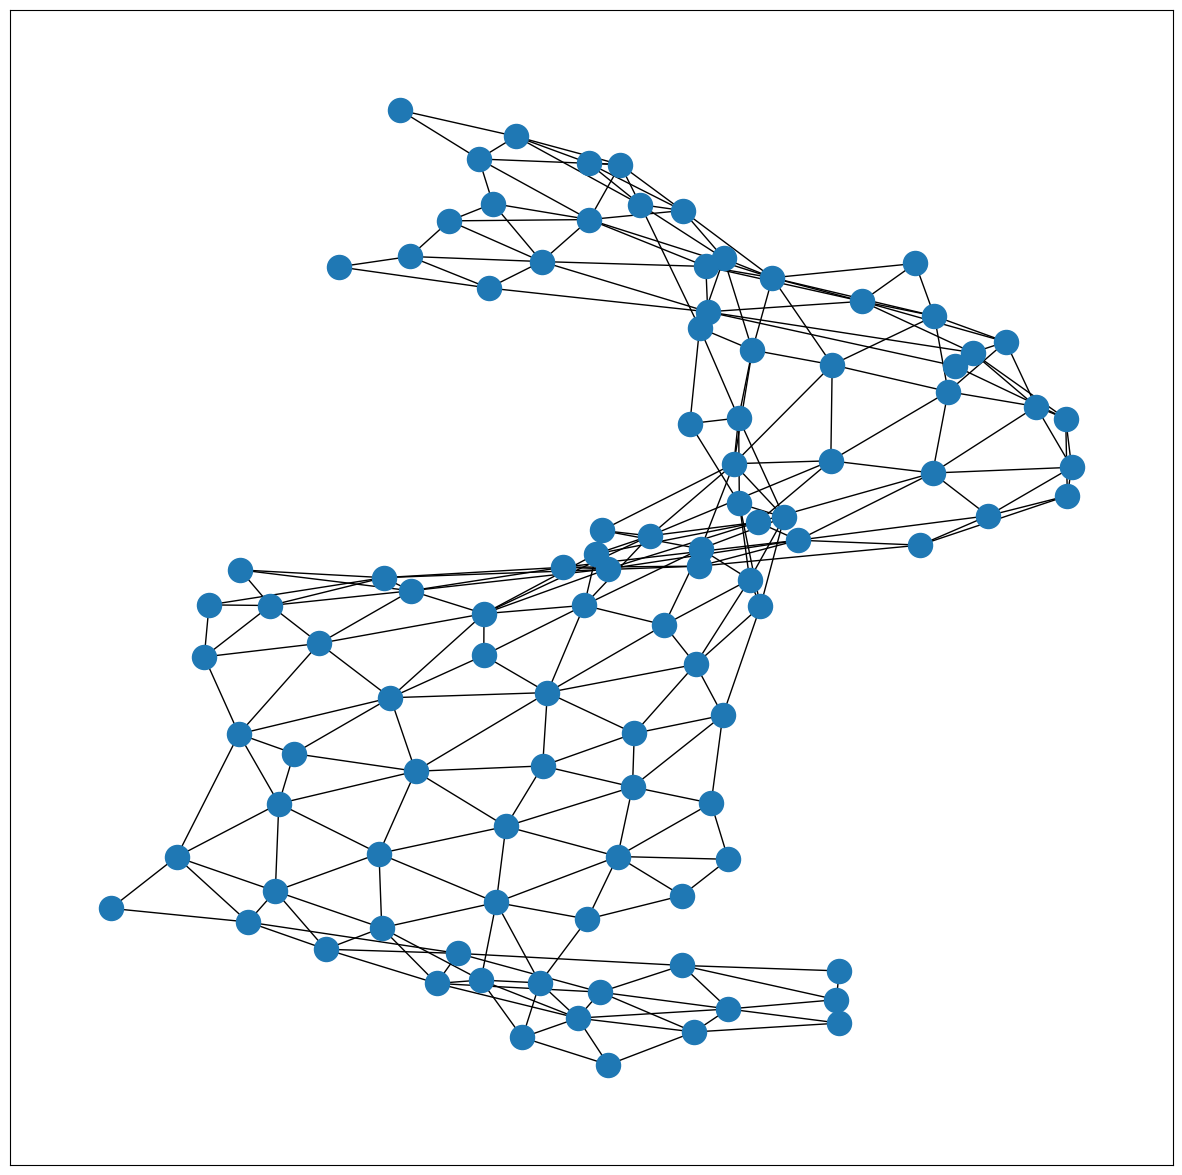

In [3]:
pos = nx.spring_layout(CG)
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx_nodes(CG, pos, ax=ax)
nx.draw_networkx_edges(CG, pos, ax=ax)
plt.show()

##### It's a start but doesn't look much like Illinois. WE can use the geospatial data insterted into the county nodes.

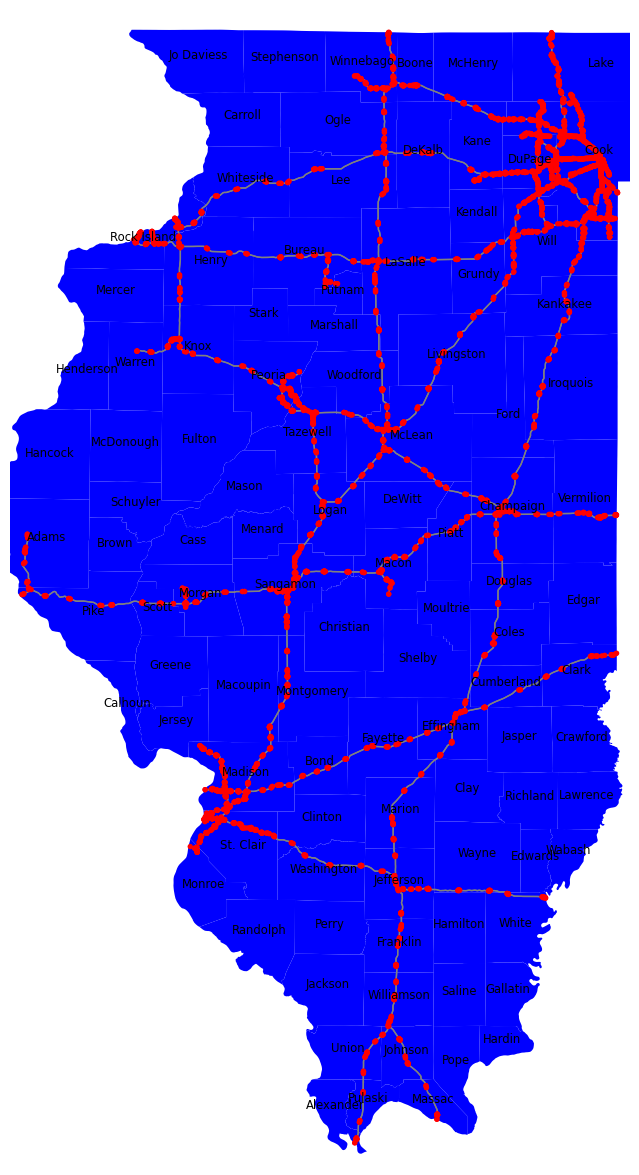

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
cgdf = gpd.GeoDataFrame({'geometry': [handler[county].geometry for county in handler]})

cgdf.plot(ax=ax, color='blue')
for key, county in handler.items():
    ax.annotate(text=county.name, xy=(county.centroid.x, county.centroid.y),
                horizontalalignment='center', fontweight='light', fontsize='small', color='black')

ox.plot_graph(highways, ax=ax, node_color='r', edge_color='gray', show=True, save=True, filepath='references/gdf_map.png')


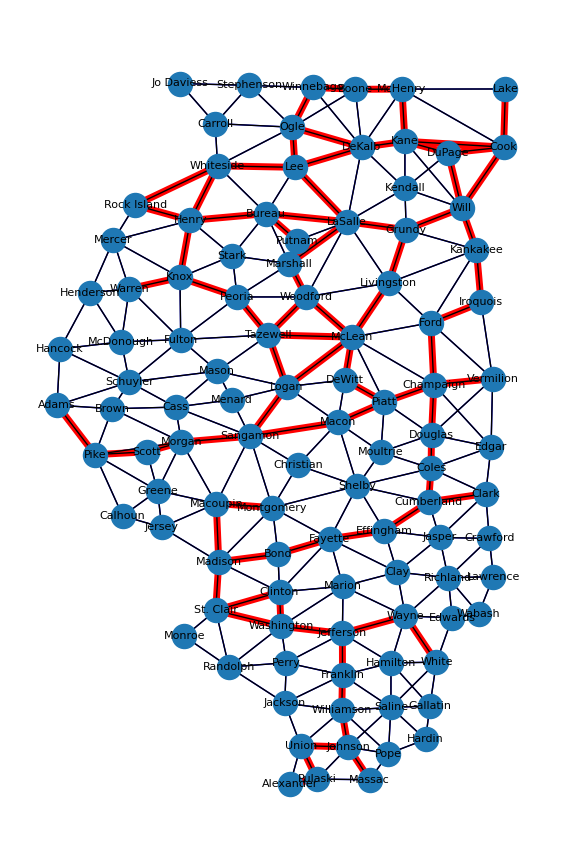

In [28]:
fig, ax = plt.subplots(figsize=(7, 11))

labels = {node: handler[node.name].name for node in CG.nodes()}
node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}


edge_colors = ['red' if CG[src][tgt]['rel'] == 'interstate' else 'blue' for src, tgt in CG.edges()]
edge_widths = [5 if CG[src][tgt]['rel'] == 'interstate' else 1 for src, tgt in CG.edges()]
nx.draw_networkx_edges(CG, pos=node_positions, edge_color=edge_colors, ax=ax, width=edge_widths)

nx.draw(CG, pos=node_positions, ax=ax)
nx.draw_networkx_labels(CG, pos=node_positions, labels=labels, font_size=8, ax=ax)
plt.savefig('references/node_network', transparent=True)
plt.show()